# 여러가지 성능 평가 척도(Evaluation Metric)에 대해서

<br/>

> **context**
1. [Loss와 Metric](#1.-Loss와-Metric)
2. [Confusion Matrix와 Precision/Recall](#2.-Confusion-Matrix와-Precision/Recall)
3. [Threshold의 변화에 따른 모델 성능](#3.-Threshold의-변화에-다른-모델-성능)
4. [Precision-Recall 커브](#4.-Precision\-Recall-커브)
5. [ROC 커브](#5.-ROC-커브)
6. [다양한 머신러닝 모델의 평가 척도](#6.-다양한-머신러닝-모델의-평가-척도)


여러 머신러닝 모델을 만들다 보면, 모델의 학습 과정에서 **성능 평가**(evaluation)는 머신러닝 모델을 만드는 데 있어 필수적인 작업입니다. 올바른 성능 평가가 이루어져야 정확하게 모델의 완성도를 측정하고, 학습에 대한 평가를 끝낼 수 있다고 판단할 수 있기 때문입니다. 

각 머신러닝 문제는 서로 다른 **성능 평가 척도(Evaluation Metric)**를 가지며, 하나의 문제애 대해서도 목적에 따라 여러가지 척도를 사용할 수 있습니다.
<br/>
예를 들자면 분류(classification) 문제에서 accuracy뿐만 아니라 precision, recall 등을 사용하는 것이 있죠. 

- [scikit learn - 3.3. Metrics and scoring: quantifying the quality of predictions](https://scikit-learn.org/stable/modules/model_evaluation.html#multilabel-ranking-metrics)

위는 사이킷런에서 제공하는 다양한 성능평가 척도들입니다. 대충 훑어만 봐도 꽤 많네요.


머신러닝에는 분류(classification)말고도 회귀(Regression), 랭킹(Ranking), 군집(Clustering)등 다양한 모델이 존재하며, 딥러닝을 통해 이미지, 텍스트, 음성 등을 다루는 분야에서는 또 그에 따른 적합한 성능 평가 방식이 필요합니다.

이번 시간에는 대표적인 성능평가 척도들에 대해서 알아봅시다!

## 1. Loss와 Metric

Loss와 Metric의 차이는 무엇일까요? 예를들어 RMSE(Root Mean Squared Error)는 Loss함수로 사용되기도 하고 회귀 모델의 Metric으로 사용되기도 합니다. 

한번 그 답을 생각해보고 아래를 읽어봅시다. 

Loss와 Metric은 사용되는 시점과 용도가 다르다고 할 수 있습니다.

- Loss : 모델 학습시 **학습 데이터(train data)**를 바탕으로 개선되어 모델의 파라미터 업데이트에 활용되는 함수
- Metric : 모델 학습 종료 후 **테스트 데이터(test data)**를 바탕으로 계산되어 학습된 모델의 성능을 평가하는데 활용되는 함수

MNIST 손글씨 분류모델을 생각해봅시다. 우리는 분류 모델의 Loss 함수로 Cross Entropy Loss를 사용했습니다. 학습된 모델을 평가하는 Metric으로는 Accuracy를 사용했었죠.

왜 굳이 Loss와 Metric을 다르게 적용했을까요? 

그 답은 바로 이산성과 연속성에 있습니다. Discrete한 Accuracy는 Continuous한 Cross Entropy에 비해 파라미터가 학습되어야 할 방향을 정확하게 제시하지 못합니다. 우리가 궁극적으로 원하는 모델은 테스트 데이터에 대한 Accuracy가 높은 모델이지, Cross Entropy가 얼마나 낮아졌는지는 궁극적인 관심은 아닙니다. 하지만 모델의 정확성을 향상시켜 더 Accuracy가 높은 모델을 만들기 위해서는 Cross Entropy가 적당한 Loss 함수가 될 것입니다.

아래 글은 참고할만한 글입니다. 한번 읽어보고 넘어갑시다 :)

- [Loss vs. Metric](https://deepestdocs.readthedocs.io/en/latest/002_deep_learning_part_1/0023/)

## 2. Confusion Matrix와 Precision/Recall

분류 모델에서는 다양한 성능평가 척도가 있습니다. 아래 친숙한 그림을 한번 봐볼까요?

![img](./data/img.png)

- True Positive(TP) : 모델이 양성(Positive)을 양성으로 맞혔을 때
- True Negative(TN) : 모델이 음성(Negative)을 음성으로 맞혔을 때
- False Positive(FP) : 모델이 음성(Neagtive)를 양성으로 잘못 예측했을 때
- False Negative(FN) : 모델이 양성을 음성으로 잘못 예측했을 때

그러면 분류 모델 측면에서 우리가 아는 **정확도(Accuracy)** 는 전체 표본 중 정확히 분류된 표본의 수 라고 볼 수 있습니다. 즉, 이진 분류일 때 정확도를 아래의 식으로 표현할 수 있습니다.

$$정확도(Accuracy) = \frac{TP+TN}{TP+TN+FP+FN}$$

멀티 클래스(multi-class)의 분류 결과를 하고 있다면, 표본의 결과를 정답, 오답으로 나누어


$$(정확도) = \frac{ (정답을~맞힌~예측의~수)} { (전체~문제의~수)} = \frac {TP+TN} {TP+TN+FP+FN}$$

로 계산할 수 있습니다.

### Precision과 Recall

모델의 정확도와 함께 언급되는 것이 있습니다. 바로 Precision과 Recall인데요, Precision은 정밀도, Recall은 재현율이라는 단어로 표시합니다.


![img](./data/img2.png)

위에서 언급된 암환자 예측 모델 사례를 다시 생각해 봅시다. 정확도(Accuracy) 대신 정밀도(Precision) 개념은 다음과 같이 정의됩니다.

$$ 정밀도(Precision) = \frac {TP} {TP+FP} $$

이 개념은 모델이 양성으로 규정한 것이 얼마나 정확한지를 보고싶을 때 사용합니다. 즉, 모델이 양성으로 잘못 규정한것이 적을수록 정밀도는 올라갑니다. 

재현율은 다음과 같이 정의됩니다.

$$ 재현율(Recall) = \frac {TP} {TP+FN} $$

이 개념은 실제로 양성이 것들이 얼마나 모델에 의해 정확하게 탐지되었나를 보고 싶은 것입니다. 실제로 음성인 것을 양성으로 잘못 규정한 것에 대해서는 관심이 없습니다. 재현율이 높다는 것은 FN이 낮다는 것입니다. 즉 모델이 실제 양성을 분류해 내지 못한 경우가 적을 수록 재현율은 올라갑니다.


모델을 생각해보면, 정확도가 높아도 precision이나 recall에서 낮은 점수가 나올 수 있습니다. 예를들어 confusion matrix의 4가지 카테고리 중 대부분이 TN에 몰려있다면 정확도는 높지만, 다른 성능평가 척도에서는 낮게 나올 수 있죠.

여기서 결론을 내릴 수 있습니다. 음성 대 양성 데이터 분포가 불균형할 경우 정확도는 모델을 평가하는데 좋은 척도가 되지 못합니다. 그렇다면 이런 불균형 데이터가 주어진 상황에서 분류 모델을 어떻게 평가하면 좋을까요?

### F-score

위에서 본 Precision과 Recall은 단독으로 평가 척도로 사용하기에 부족한 면이 있습니다.

예를 들어, Precision이 좋은 척도가 될만 한 스팸메일 분류기 모델을 생각해 봅시다. 이 경우에 FN은 다소 허용할만 합니다. 스팸이 잘못 걸러져 메일함이 들어오긴 했지만 FP가 발생할 경우에는 꼭 필요한 비지니스 메일이 스팸함에 버려 엄청난 손실이 발생하게 될지도 모릅니다. 그래서 FP를 줄이려면 애매한 메일을 음성으로 판단하는 게 좋은데, 그렇다고 해서 FN을 무한히 허용하면 스팸 메일 분류기 자체가 쓸모없어지는 상황이 될 수 있어 좋지 않습니다.

Recall이 좋은 척도가 될만한 사례는 위의 암환자 예측 모델이 적당할 것 같습니다. 암 의심환자를 음성으로 분류했다가 환자의 생명을 위험에 빠뜨리게 되면 안되므로, FN을 최소화하는 Recall이 좋은 척도가 될 수 있을지도 모릅니다. 하지만 여기는 함정이 있습니다. Recall을 최대화하는 방법은 간단합니다. 모든 환자를 양성으로 진단해 버리면 됩니다. 적어도 FN이 발생하게 되지는 않으니 Recall은 무조건 1이 됩니다. 그러나 이런 예측모델 또한 쓸모가 없긴 마찬가지입니다.

Precision과 Recall이라는 용어가 익숙하다면, 아마도 F1 score라는 개념도 익숙하실 것입니다. 이 개념은 아래의 F score에서 $\beta$가 1이 될 때를 말합니다. F1 score는 Precision과 Recall의 **조화평균**이 되는 값으로서, Precision과 Recall 둘 다 고려할 수 있어서 분류 모델의 훌륭한 척도가 됩니다.

$$F_\beta = (1 + \beta^2) \cdot \frac{\mathrm{precision} \cdot \mathrm{recall}}{(\beta^2 \cdot \mathrm{precision}) + \mathrm{recall}}$$

recall을 중요시 하고싶다면 beta값을 1보다 크게하고, precision을 중요하게 생각하고 싶다면 beta 크기를 줄여주는 형식으로 F-Score를 구하면 도움이 됩니다.

## 3. Threshold의 변화에 다른 모델 성능

Threshold는 일정 이상 기준선이라고 생각하시면 됩니다. 앞서 우리는 recall과 Precision을 살펴보았죠. 이때 양성일 확률을 0.5가 넘으면 양성으로 분류하는 것이 아니라 양성일 확률이 0.3만 넘어도 양성으로 분류하도록 하면 어떨까요? 당연히 confusion matrix의 값들이 달라질 것입니다.

이것은, 모델의 성능이라는 것이 F1 score같은 숫자 하나로만 규정될 수 있는 게 아니라는 것을 의미하게 됩니다. (물론 모델 출력의 해석방식이 고정적으로 주어진다면 F1 score는 유효한 Metric이 됩니다.) 이렇게 Threshold가 달라지는 것을 고려하여 전체적인 모델의 성능을 평가하는 방법으로 **PR(Precision and Recall) 커브**와 **ROC(Receiver Operating Characteristic) 커브**를 그려보는 두가지 방법이 있습니다.

Threshold의 변화에 따라 모델 성능이 달라지는 상황을 간단한 분류 모델 예제를 통해 살펴 봅시다.

#### 실습에 사용할 데이터 준비

실습에 사용하기위해 사이킷런에서 제공하는 붓꽃 데이터를 가져오도록 하겠습니다.

In [1]:
from sklearn import datasets

from sklearn.model_selection import train_test_split
import numpy as np

iris = datasets.load_iris()
X = iris.data
y = iris.target

print(X.shape)  # 4개의 feature를 가진 150개의 데이터입니다.

(150, 4)


#### Task의 재구성

붓꽃 분류 예제는 상당히 간단하기 때문에, 그대로 훈련시키면 거의 100%에 가까운 성능을 냅니다. 성능 평가를 공부하는 지금으로서는 조금 재미가 없겠지요?

일부러 데이터에 잡음(noise)을 추가해 성능을 낮추어 보겠습니다. 랜덤한 값으로 이루어진 `200 * n_features`, 즉 800개의 컬럼을 매 데이터마다 추가합니다.

In [2]:
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

print(X.shape)  # 804개의 feature를 가진 150개의 데이터가 되었습니다.

(150, 804)


원래 붓꽃의 데이터는 총 3가지의 라벨로 나뉩니다.
하지만 분석을 간단히 하기 위해 여기서는 양성/음성으로 나뉘는 이진 분류(binary classification) 문제로 줄여, 2개의 라벨 간 분류만 해보겠습니다.

In [3]:
#- 0, 1 라벨에 속하는 붓꽃 샘플만 사용하도록 제한합니다.
X_train, X_test, y_train, y_test = train_test_split(X[y < 2], y[y < 2],
                                                    test_size=.5,
                                                    random_state=random_state)

print("훈련, 테스트 셋에 사용된 라벨의 종류: {} ".format( set(y_test)))
print("훈련 데이터 shape   :", X_train.shape)
print("테스트 데이터 shape :", X_test.shape)

훈련, 테스트 셋에 사용된 라벨의 종류: {0, 1} 
훈련 데이터 shape   : (50, 804)
테스트 데이터 shape : (50, 804)


#### 모델 학습

2개의 라벨로 나뉜 데이터를 가지고, SVM(Support Vector Machine)으로 모델을 구성하여 학습시킨 후 test 데이터를 넣어 정확도를 확인해보도록 하겠습니다.

In [4]:
from sklearn import svm

classifier = svm.SVC(kernel='poly', random_state=random_state)
classifier.fit(X_train, y_train)

classifier.score(X_test,y_test)

0.48

`classifier.score()` 함수는 테스트데이터에 대한 평균 정확도(Accuracy)를 리턴합니다. 0.5에 가까운 수준의 binary classifier라니, 전혀 분류 성능이 없다고 봐야겠군요. 이번에는 SVM의 커널을 바꾸어 보겠습니다.

In [5]:
classifier = svm.SVC(kernel='linear', random_state=random_state)
classifier.fit(X_train, y_train)

classifier.score(X_test,y_test)

0.8

이번에는 80% 정도의 정확도가 나왔습니다. SVM은 아주 복잡하면서도 아름다운 수학적 배경을 갖춘 분류모델로 알려져 있습니다. SVM 자체를 이해하는 것은 오늘의 범위를 넘어서기 때문에 일단은 SVM 모델의 성능을 평가하는 데 집중하도록 하겠습니다.

In [6]:
classifier.predict(X_test)

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1])

In [7]:
y_test

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0])

`classifier.predict()` 리턴값과 y_test를 비교해 보았습니다. 모델 뒤에 Softmax가 있어서 확률값을 출력하는 Logistic Regression 모델과는 달리, SVM에서 별도로 제공하는 `decision_function()` 함수가 존재합니다. 이 함수값은 (-1, 1) 범위값을 가지는데, 0보다 작으면 음성(label=0), 0보다 크면 양성(label=1)으로 분류하게 됩니다.

In [8]:
y_score = classifier.decision_function(X_test)
print(y_score)

[-0.29512751  0.28798352  0.17635465  0.19056886  0.38391605 -0.30841065
 -0.10084254 -0.23481309  0.18576987 -0.36011033 -0.15726747 -0.25714889
 -0.14979669  0.02063898  0.04509171 -0.17239443  0.07287957 -0.0689103
 -0.13452462 -0.30697712  0.25404241 -0.28916471 -0.52061453  0.25252233
  0.02177777 -0.10980907  0.37468422  0.35303004 -0.6211302  -0.42920064
 -0.14770647  0.00593404 -0.34735296  0.32245409 -0.19439024  0.1288847
 -0.0320947  -0.23008604 -0.10135548 -0.46962186  0.05184235  0.0609688
  0.05632596  0.44769206 -0.38804349  0.24704844  0.16063684  0.0144203
 -0.03136574  0.11179177]


그럼 여기서 **confusion_matrix**를 계산해 보겠습니다. 실제 정답값 y_test와 y_pred를 비교해 보면 다음과 같은 결과가 얻어집니다. confusion_matrix는 `[[TP, FN], [FP, TN]]`의 형태로 출력됩니다. 사이킷런에서는 `classification_report`이라는 함수를 통해 confusion_matrix에서 얻어진 TP, FN, FP, TN 값을 토대로 Precision, Recall, F1-score 등의 평가척도값을 계산해 줍니다.

In [9]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = classifier.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)
rpt_result = classification_report(y_test, y_pred)
print(rpt_result)

[[20  4]
 [ 6 20]]
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        24
           1       0.83      0.77      0.80        26

    accuracy                           0.80        50
   macro avg       0.80      0.80      0.80        50
weighted avg       0.80      0.80      0.80        50



방금 우리는 `decision_function` 값이 0보다 큰 것을 양성으로 분류했습니다. 만약 양성 분류 기준을 좀더 확대해서 -0.1보다 큰 것을 양성으로 분류한다면 어떻게 될까요?

In [10]:
y_pred_new_threshold = classifier.decision_function(X_test) > -0.1
conf_mat = confusion_matrix(y_test, y_pred_new_threshold)
print(conf_mat)
rpt_result = classification_report(y_test, y_pred_new_threshold)
print(rpt_result)

[[18  6]
 [ 5 21]]
              precision    recall  f1-score   support

           0       0.78      0.75      0.77        24
           1       0.78      0.81      0.79        26

    accuracy                           0.78        50
   macro avg       0.78      0.78      0.78        50
weighted avg       0.78      0.78      0.78        50



어떻습니까? 양성 분류 기준을 확대했기 때문에, Recall이 0.77에서 0.81로 상승했습니다. 하지만 전체적인 F1-score는 0.80에서 0.79로 소폭 하락했습니다. 하지만 태스크의 특성에 따라서는 이것이 오히려 더 좋은 결과를 가져올지도 모르겠습니다.

Threshold 값을 조금씩 바꿔보면서 평가척도값이 어떻게 변하는지 확인해 봅시다.

In [11]:
y_pred_new_threshold = classifier.decision_function(X_test) > -0.2
conf_mat = confusion_matrix(y_test, y_pred_new_threshold)
print(conf_mat)
rpt_result = classification_report(y_test, y_pred_new_threshold)
print(rpt_result)

[[12 12]
 [ 2 24]]
              precision    recall  f1-score   support

           0       0.86      0.50      0.63        24
           1       0.67      0.92      0.77        26

    accuracy                           0.72        50
   macro avg       0.76      0.71      0.70        50
weighted avg       0.76      0.72      0.71        50



In [12]:
y_pred_new_threshold = classifier.decision_function(X_test) > 0.1
conf_mat = confusion_matrix(y_test, y_pred_new_threshold)
print(conf_mat)
rpt_result = classification_report(y_test, y_pred_new_threshold)
print(rpt_result)

[[23  1]
 [12 14]]
              precision    recall  f1-score   support

           0       0.66      0.96      0.78        24
           1       0.93      0.54      0.68        26

    accuracy                           0.74        50
   macro avg       0.80      0.75      0.73        50
weighted avg       0.80      0.74      0.73        50



In [13]:
y_pred_new_threshold = classifier.decision_function(X_test) > 0.2
conf_mat = confusion_matrix(y_test, y_pred_new_threshold)
print(conf_mat)
rpt_result = classification_report(y_test, y_pred_new_threshold)
print(rpt_result)

[[24  0]
 [17  9]]
              precision    recall  f1-score   support

           0       0.59      1.00      0.74        24
           1       1.00      0.35      0.51        26

    accuracy                           0.66        50
   macro avg       0.79      0.67      0.63        50
weighted avg       0.80      0.66      0.62        50



값이 계속 조금씩 달라집니다. 이렇게 우리는 confusion matrix를 만들기 전에 threshold를 설정할 수 있습니다.

## 4. Precision-Recall 커브

동일한 모델이어도 Threshold 값에 따라 Precision, Recall 값이 변하는 것을 위에서 확인했습니다. **PR(Precision-Recall)커브**는 Recall을 x축, Precision을 y축으로 놓고 Threshold 변화에 따른 두 값의 변화를 그래프로 그린 것입니다.

한번 그려봅시다. PR커브는 사이킷런에 내장되어있는 함수기도 합니다.

Text(0.5, 1.0, 'binary class Precision-Recall curve: AP=0.91')

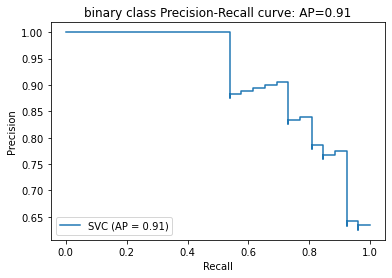

In [16]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(classifier, X_test, y_test)
disp.ax_.set_title('binary class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

위 그림을 보면 Precision과 Recall 사이의 트레이드오프 관계를 확인할 수 있습니다. Threshold값에 따라 우리가 얻게 되는 Precision, Recall 값은 저 그래프상의 어딘가가 될 것입니다. 물론 우리가 원하는 값은 Precision이든 Recall이든 모두 1에 가깝기를 원합니다. 이상적으로는 그래프가 (1, 1)에 찍히면 좋겠습니다만, 가급적 위 그래프가 (1, 1)에 근접하도록 그려지길 바랍니다.

그래서 Threshold 값에 무관하게 모델의 전체적인 성능을 평가하는 방법으로, 위 PR 커브 아래쪽 면적을 계산하는 방법이 있습니다. 이것을 AUC(Area Under Curve) 값이라고 합니다. PR AUC를 계산하는 방법으로 다음과 같이 사이킷런에서 제공하는 `average_precision_score` 함수를 사용합니다.

$$\text{AP} = \sum_n (R_n - R_{n-1}) P_n$$

위 수식의 특성을 살펴보면, `average_precision_score(AP)` 값은, n 값을 무한히 크게 한다면 아주 작은 Recall 구간에 대해 Pn 값을 적분하는 것과 같게 됩니다. 그러므로 PR 커브의 아래쪽 면적인 `PR AUC`와 같은 의미가 되겠군요. 하지만 사이킷런 문서에서는 `average_precision_score`와 `PR AUC`가 구현 측면에서 약간 다르다고 설명하고 있습니다. 두 개념이 의미적으로 비슷하게 사용될 수 있다고만 이해하면 될 것 같습니다.

In [15]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)

print('평균 precision-recall score: {0:0.2f}'.format(
      average_precision))

평균 precision-recall score: 0.91


`average_precision_score` 값은 최대 1이 될 수 있을 것입니다. 위에서는 0.91이 나왔군요. 그렇다면 모델을 바꿔 보면 이 값이 어떻게 달라질지 궁금해집니다. 우리는 위에서 SVM의 커널을 'poly'로 주었을 때 Accuracy가 매우 낮았던 것을 기억합니다. 이때의 averageprecisionscore 값이 어떻게 될지 직접 구현해서 확인해 봅시다.

In [17]:
from sklearn.metrics import average_precision_score

classifier = svm.SVC(kernel='poly', random_state=random_state)
classifier.fit(X_train, y_train)
y_score = classifier.decision_function(X_test)
average_precision = average_precision_score(y_test, y_score)

print('평균 precision-recall score: {0:0.2f}'.format(
      average_precision))

평균 precision-recall score: 0.90


Text(0.5, 1.0, 'binary class Precision-Recall curve: AP=0.90')

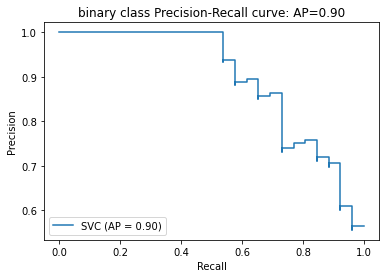

In [18]:
disp = plot_precision_recall_curve(classifier, X_test, y_test)
disp.ax_.set_title('binary class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

## 5. ROC 커브

**ROC(Receiver Operating Characteristic Curve)** 는 수신자 조작 특성 곡선이라는 단어로 표현할 수 있습니다.
ROC는 앞서 계산해보았던 **Confusion Matrix** 수치를 활용해, 분류기의 분류 능력을 그래프로 표현하는 방법입니다. 물론 이 그래프도 PR 커브와 마찬가지로 분류기의 Threshold 값의 변화에 따라 Confusion Matrix에 생기는 변화로 인해 그려지는 것입니다.

### ROC 예시 곡선

ROC를 그리는 축인 TP Rate과 FP Rate은 Precision, Recall과 비슷해 보이지만 조금 다른 개념입니다.

TP Rate과 FP Rate은 다음과 같이 계산합니다.

$$TPR (Sensitivity) = \frac {TP} {TP + FN}$$

$$FPR (1-Specificity) = \frac {FP} {TN + FP}$$

![img](./data/img3.png)

위 그림은 ROC 그래프의 예시이며, 점선이 ROC 입니다.

TP Rate(TPR)의 수식을 잘 보면 실은 우리가 잘 아는 Recall과 같은 것입니다. FP Rate는 `1-Specificity`라고 소개되어 있는데, Specificity라는 것은 $\frac {TN} {TN + FP}$ 이 되므로, 실은 음성 샘플에 대한 Recall이라고 볼 수 있습니다.

### AUC 예시 영역

![IMG](./data/img4.png)

위 그림은 **ROC AUC(Area Under the ROC Curve)** 를 보여주는 회색 영역으로, 저 영역의 넓이가 넓은 모델일수록, 상대적으로 좋은 성능을 보여준다고 합니다. 하지만 PR 커브만큼 직관적으로 와닿지 않아서, 왜 그런 것인지 얼른 와닿지 않습니다. 그렇다면 일단 한번 그려 보겠습니다. 사이킷런에는 `roc_curve`, `auc` 라는 함수를 통해 ROC를 그리거나 ROC AUC를 쉽게 구해볼 수 있습니다.

In [19]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

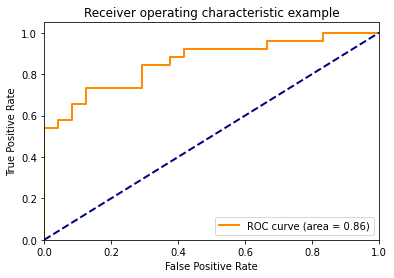

auc result:0.8605769230769231


In [20]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
print(f"auc result:{roc_auc}")

아주 이상적으로 Precision과 Recall이 전부 1이 되는 완벽한 모델이라면 ROC 커브에서는 어디에 점이 찍힐까요? 네, 바로 (0, 1)일 것입니다. 양성과 음성에 대한 Recall이 모두 1이 될 테니 TPR은 1, FPR은 0이 될 것입니다.

몇가지 극단적인 경우를 생각해 봅시다. 모델이 모든 샘플에 대해 양성이라고 분류한다면 어떨까요? 이땐 이 분류기가 (1, 1)에 찍힐 것입니다. 반대로 모든 샘플에 대해 음성이라고 분류한다면 이 분류기는 (0, 0)에 찍힐 것입니다. 이번엔 완벽한 랜덤 분류기를 가정해 봅시다. 이 분류기는 양성이든 음성이든 무관하게 p의 확률로 양성이라고 분류할 것입니다. 이 랜덤분류기의 Recall은 p가 될 것입니다. 음성에 대한 Recall도 p가 될 테니 이 분류기는 (p, 1-p)에 찍힐 것입니다.

위 그래프에서 (0, 0)과 (1, 1)을 잇는 파란 점선은 바로 위와 같은 극단적인 경우들만 모아놓은 경우입니다. 그래서 의미있는 분류기라면 적어도 이 파란 점선보다는 위쪽에 그려져야 하며, 가급적 (0, 1)에 가깝게 그려질 수록 우수한 분류기가 됩니다. 그러므로 ROC AUC가 클수록 상대적으로 좋은 성능의 모델이라고 할 수 있을 것입니다.


## 6. 다양한 머신러닝 모델의 평가 척도

지금까지 다양한 분류 모델의 평가 척도에 대해서 알아보았습니다. 분류 문제에 있어 문제의 성격, 분류 기준 등 다양한 변수에 따라 정확한 모델 평가 척도는 달라질 수 있어 다소 복잡했습니다. 하지만 머신러닝에는 분류만 있는 것이 아니라 회귀, 추천, 군집 등 다양한 모델이 있습니다. 음성, 이미지, 텍스트 등의 생성형 모델들이 가지는 독특한 평가 척도들도 매우 다양합니다.

이번 시간에는 간단히 무엇이 있는지만 확인해봅시다.

### 회귀 모델의 평가 척도

회귀 모델은 분류 모델에 비해 평가 척도를 다루는 것이 간단합니다. Loss 함수가 테스트 셋에 적용되는 것이 그대로 Metric가 되는 경우가 대부분입니다. 

회귀 모델의 평가 척도는 다양하게 있습니다. 아래 글에서 자세히 확인할 수 있습니다.

- [회귀의 오류 지표 알아보기](https://partrita.github.io/posts/regression-error/)

### 랭킹 모델의 평가 척도

추천 시스템은 넓게 보면 정보 검색 (information retrieval)과 같은 로직을 가지고 있습니다. 이런 모델들이 일반적인 분류 모델과 다른 점은, `랭킹(우선순위)` 개념이 추가된다는 점입니다. User를 입력으로 했을 때, item들이 추천할만한지 여부를 분류만 하는 것이 아니라 얼마나 추천할만한지 랭킹까지 매겨야 한다는 점입니다.

랭킹 모델의 평가 척도에 대한 아래 글을 읽어봅시다.

- [정보 검색(Information Retrieval) 평가는 어떻게 하는 것이 좋을까?(2/2)](https://lamttic.github.io/2020/03/20/01.html)

- MRR(Mean Reciprocal Rank)
    1. 각 사용자마다 제공한 추천 컨텐츠 중 관련있는 컨텐츠의 가장 높은 위치를 역수로 계산한다.
    2. 사용자마다 계산된 점수를 모아 평균을 계산한다.
- MAP(Mean Average Precision)
    1. 각 사용자마다 관련된 컨텐츠를 구하여 해당 관련 컨텐츠 위치까지의 모든 목록(sublist)에 대하여 정밀도를 계산한다.
    2. 계산된 정밀도 값들에 대하여 사용자별로 평균을 내고, 그 결과를 모두 모아 평균을 계산한다.
- NDCG(Normalized Discounted Cumulative Gain)
    1. 모든 추천 컨첸츠들의 관련도를 합하여 CG(Cumulative gain)을 구한다.
    2. CG에서 추천 컨텐츠들의 관련도를 합하였다면 DCG는 각 추천 컨텐츠의 관련도를 Log 함수로 나누어 값을 구한다. log 함수 특성상 위치 값이 클수록 DCG의 값을 더 작아지게 함으로써 상위 컨텐츠의 값을 점수에 더 반영할 수 있게 한다.
    3. DCG 값에 관련도를 더 강조하고 싶다면, $2^관련도 - 1$과 같이 관련도의 영향을 증가시킬 수 있다.
    4. 사용자마다 제공되는 추천 컨텐츠의 DCG와는 별개로 IDCG(이상적인 DCG)를 미리 계산해놓는다.
    5. 각 사용자의 DCG를 IDCG로 나누어서 사용자별 NDCG를 구한다.
    6. 사용자별 NDCG의 평균을 구하여 해당 IR의 NDCG를 구한다.


### 이미지 생성 모델의 평가 척도

모델을 평가한다는 것은 결국 정답과 예측치 사이의 거리를 측정하는 방식입니다. 그런데 이미지 생성 모델에서 원본 이미지와 새로운 이미지 사이의 거리를 어떻게 측정할 수 있을까요?

아래 글에서는 세가지 방법이 있다고 합니다. MSE, PSNR, SSIM인데요, 아래 글에서 한번 직접 확인해보세요.

- [A Quick Overview of Methods to Measure the Similarity Between Images](https://medium.com/@datamonsters/a-quick-overview-of-methods-to-measure-the-similarity-between-images-f907166694ee)


### 기계 번역 모델의 평가 척도

이미지 생성모델에서 원본과 생성본을 비교하여 거리를 잰다는 것은 까다롭긴 하지만 RGB 공간 등 두 이미지 사이의 거리를 측정할 수 있는 개념적 공간이 존재합니다. 그러나 텍스트라면 어떨까요? 텍스트 생성 모델 중 가장 대중적인 것은 기계번역 모델입니다. 영어를 한국어로 번역한 문장이 정답 한국어와 얼마나 비슷한지를 어떻게 측정하면 좋을까요?

기계번역 모델의 평가척도에 대한 아래 글을 읽어봅시다.

- [BLEU Score](https://donghwa-kim.github.io/BLEU.html)


In [28]:
from IPython.core.display import display, HTML

display(HTML("<style> .container{width:90% !important;}</style>"))